# WeatherPy

---

#### Dependancies

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


#### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
cities = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [50]:

# Define an empty list to hold response information
city_data = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for city in cities: 
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"

    response = requests.get(query_url).json()

     # Try to grab the city's information if available
    try: 
        city_data.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])   
    
    # Log the url, record, and set numbers
        print(f"Processing Record {record_count} of Set {set_count} | {response['name']}")
    # Add 1 to the record count
        record_count += 1

    
    except:
        print("City not found. Skipping...")
        set_count += 1
        record_count = 1
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 2 | Mataura
Processing Record 2 of Set 2 | Isangel
Processing Record 3 of Set 2 | Punta Arenas
Processing Record 4 of Set 2 | Puerto Ayora
Processing Record 5 of Set 2 | Batemans Bay
Processing Record 6 of Set 2 | Cidreira
Processing Record 7 of Set 2 | Ushuaia
Processing Record 8 of Set 2 | New Norfolk
Processing Record 9 of Set 2 | Aleppo Governorate
Processing Record 10 of Set 2 | Bluff
Processing Record 11 of Set 2 | Butaritari
Processing Record 12 of Set 2 | Yumen
Processing Record 13 of Set 2 | Broome
City not found. Skipping...
Processing Record 1 of Set 3 | Hobyo
Processing Record 2 of Set 3 | Ukiah
Processing Record 3 of Set 3 | Vaini
Processing Record 4 of Set 3 | Wanxian
Processing Record 5 of Set 3 | Arraial do Cabo
Processing Record 6 of Set 3 | Yeppoon
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 5 | Ilulissat
City not fo

#### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
# Convert the cities weather data into a Pandas DataFrame
citys_dict = {
    'City': city_data,
    'Latitude' : lat,
    'Longitude' : lng,
    'Max Temperature (°C)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (MPH)': wind_speed,
    'Country': country,
    'Date': date
 }

city_data_df = pd.DataFrame(citys_dict)
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Mataura,-46.1927,168.8643,59.49,76,100,5.93,NZ,1669755426
1,Isangel,-19.5500,169.2667,84.31,79,91,3.44,VU,1669755426
2,Punta Arenas,-53.1500,-70.9167,48.31,57,75,27.63,CL,1669755426
3,Puerto Ayora,-0.7393,-90.3518,78.76,86,58,5.99,EC,1669755426
4,Batemans Bay,-35.7167,150.1833,62.10,67,40,3.67,AU,1669755426


In [53]:
# Display sample data
city_data_df.count


<bound method DataFrame.count of              City  Latitude  Longitude  Max Temperature (°C)  Humidity (%)  \
0         Mataura  -46.1927   168.8643                 59.49            76   
1         Isangel  -19.5500   169.2667                 84.31            79   
2    Punta Arenas  -53.1500   -70.9167                 48.31            57   
3    Puerto Ayora   -0.7393   -90.3518                 78.76            86   
4    Batemans Bay  -35.7167   150.1833                 62.10            67   
..            ...       ...        ...                   ...           ...   
556      Buraidah   26.3260    43.9750                 72.05            26   
557         Mīnāb   27.1467    57.0801                 66.52            82   
558        Kielce   50.8703    20.6275                 33.03             1   
559       Amurzet   47.6967   131.0981                  0.70            73   
560        Karema   -6.8205    30.4389                 72.18            81   

     Cloudiness (%)  Wind Spee

In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
City_ID,,,,,,,,,
0,Mataura,-46.1927,168.8643,59.49,76,100,5.93,NZ,1669755426
1,Isangel,-19.5500,169.2667,84.31,79,91,3.44,VU,1669755426
2,Punta Arenas,-53.1500,-70.9167,48.31,57,75,27.63,CL,1669755426
3,Puerto Ayora,-0.7393,-90.3518,78.76,86,58,5.99,EC,1669755426
4,Batemans Bay,-35.7167,150.1833,62.10,67,40,3.67,AU,1669755426


#### Checking DF is Clean and Consistent


In [56]:
cleaned_city_df = city_data_df.loc[city_data_df['Humidity (%)'] <= 100]
cleaned_city_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
City_ID,,,,,,,,,
0,Mataura,-46.1927,168.8643,59.49,76,100,5.93,NZ,1669755426
1,Isangel,-19.5500,169.2667,84.31,79,91,3.44,VU,1669755426
2,Punta Arenas,-53.1500,-70.9167,48.31,57,75,27.63,CL,1669755426
3,Puerto Ayora,-0.7393,-90.3518,78.76,86,58,5.99,EC,1669755426
4,Batemans Bay,-35.7167,150.1833,62.10,67,40,3.67,AU,1669755426
...,...,...,...,...,...,...,...,...,...
556,Buraidah,26.3260,43.9750,72.05,26,100,12.55,SA,1669755424
557,Mīnāb,27.1467,57.0801,66.52,82,32,0.00,IR,1669755533
558,Kielce,50.8703,20.6275,33.03,1,13,5.79,PL,1669755385


#### Plotting Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

##### Latitude Vs. Temperature

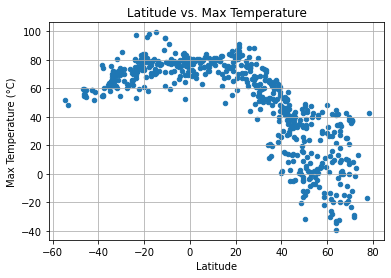

In [68]:
# Plot the scatter plot that shows the relation between latitude and max temperature
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', 
                     title=f'Latitude vs. Max Temperature')
                    
              
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Temp Plot.png")
# Show plot
plt.show()

##### Latitude Vs. Humidity

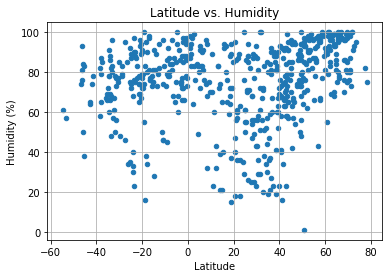

In [69]:
# Plot the scatter plot that shows the relation between latitude and humidity
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Latitude vs. Humidity')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Humidity Plot.png")
# Show plot
plt.show()

##### Latitude Vs. Cloudiness

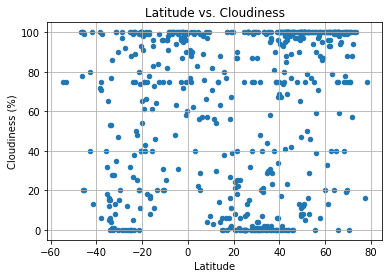

In [70]:
# Plot the scatter plot that shows the relation between latitude and cloudiness
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Latitude vs. Cloudiness')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Cloudiness Plot.png")
# Show plot
plt.show()

##### Latitude vs. Wind Speed Plot

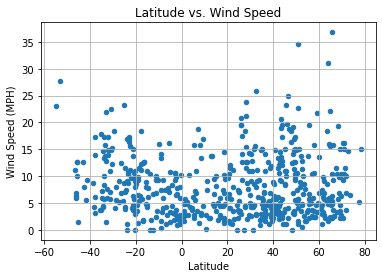

In [72]:
# Plot the scatter plot that shows the relation between latitude and max temperature
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Latitude vs. Wind Speed')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Wind Speed Plot.png")
# Show plot
plt.show()

---

### Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

nor_hem_df = cleaned_city_df[cleaned_city_df["Latitude"]>0]
sth_hem_df = cleaned_city_df[cleaned_city_df["Latitude"]<0]

####  Temperature vs. Latitude Linear Regression Plot

* Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.6443747187588343
The linear regression model is y = -1.35x + 94.14


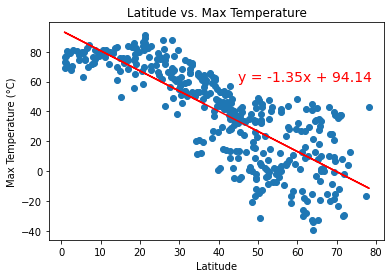

In [95]:
# Plot the linear regression model between latitude and max temperature in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Max Temperature (°C)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Max Temperature (°C)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 60),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Northern Hemp, max temp decreases when city is away form 0 degree latitude.

* Southern Hemisphere - Max Temp vs. Latitude Linear Regression

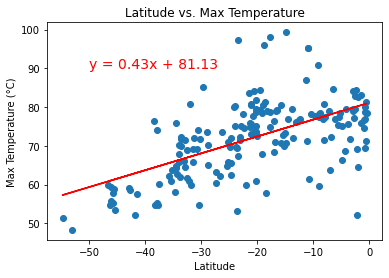

The r-squared is 0.3355087631117202
The linear regression model is y = 0.43x + 81.13


In [125]:
# Plot the linear regression model between latitude and max temperature in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Max Temperature (°C)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Max Temperature (°C)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=14,color="red")
plt.show()

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Southern Hemp, max temp increases when city is closer to 0 degree longitude.

### Humidity vs. Latitude Linear Regression Plot

* Northern Hemisphere - Humidity vs. Latitude Linear Regression

The r-squared is 0.10394653786753716
The linear regression model is y = 0.37x + 59.39


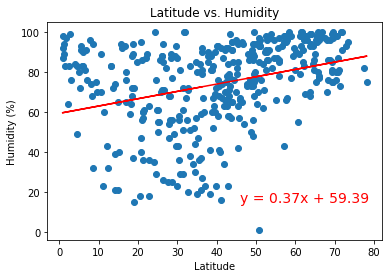

In [113]:
# Plot the linear regression model between latitude and humidity in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Humidity (%)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Humidity (%)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Northern Hemp, humidity increases when city is away from 0 degree latitude.


The r-squared is 0.04621127776970706
The linear regression model is y = 0.27x + 80.81


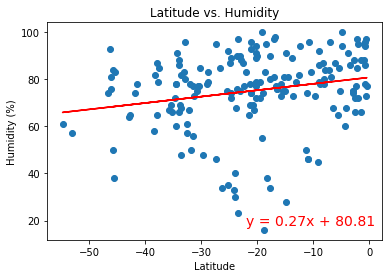

In [116]:
# Plot the linear regression model between latitude and humidity in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Humidity (%)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Humidity (%)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Southern Hemp, humidity increeases substnatially when city is moving toward the 0 degree latitude.

### Cloudiness vs. Latitude Linear Regression Plot

* Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

The r-squared is 0.08678547450374732
The linear regression model is y = 0.62x + 38.87


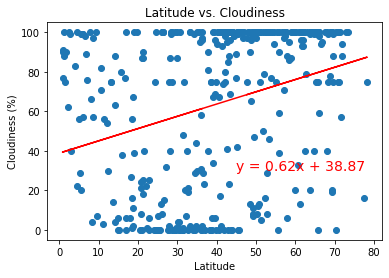

In [121]:
# Plot the linear regression model between latitude and cloudiness in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Cloudiness (%)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Cloudiness (%)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Northerm Hemp, cloudiness percentage increases substnatially when when city is moving past 40 longitude

The r-squared is 0.11598395982461526
The linear regression model is y = 0.95x + 83.51


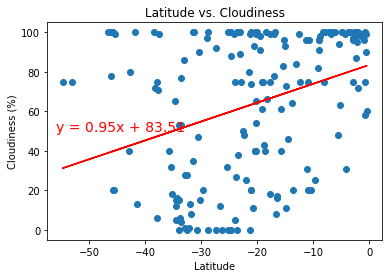

In [122]:
# Plot the linear regression model between latitude and cloudiness in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Cloudiness (%)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Cloudiness (%)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Southern Hemp, cloudiness volume increases when city is moving toward the 0 latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is 0.01503375381800178
The linear regression model is y = 0.04x + 6.3


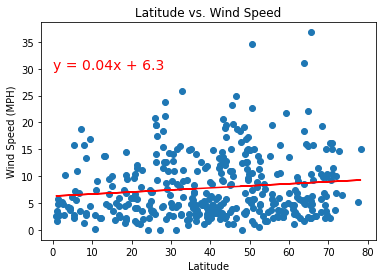

In [124]:

# Plot the linear regression model between latitude and wind speed in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Wind Speed (MPH)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Wind Speed (MPH)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Northern Hemp, wind speed not affected much by latitude and demonstrates steeper negligable change when city is away from 0 latitude.

The r-squared is 0.14086894598249047
The linear regression model is y = -0.15x + 4.99


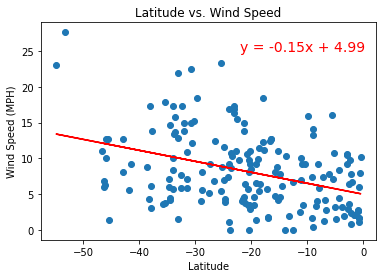

In [127]:
# Plot the linear regression model between latitude and wind speed in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Wind Speed (MPH)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Wind Speed (MPH)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,25),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

***Discussion about the linear relationship:*** Southern Hemp, wind speed not affected much by latitude and demonstrates steeper slope when city is closer to 0 latitude.